In [140]:
import pandas as pd
import numpy as np

In [141]:

returns = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv", header=0,index_col=0,
                parse_dates=True, na_values=-99.99)

In [142]:
returns.tail()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
201808,NaN,3.47,4.04,2.87,3.09,5.05,3.90,3.54,2.49,2.41,5.07,5.30,4.70,3.02,5.01,3.50,3.58,2.65,2.34
201809,NaN,-2.24,-1.85,0.08,-2.04,-2.38,-2.48,-0.74,0.19,-1.68,-3.08,-3.22,-1.23,-2.65,-2.27,-1.31,-0.12,-0.51,0.87
201810,NaN,-10.76,-10.88,-7.63,-10.52,-11.74,-10.55,-9.45,-7.41,-10.02,-11.98,-11.89,-11.52,-11.58,-9.23,-10.74,-8.04,-8.28,-6.57
201811,NaN,-2.08,2.18,2.19,-2.78,1.69,1.46,2.62,2.49,-3.65,-0.23,1.23,2.30,1.74,1.11,3.54,1.63,2.45,2.53
201812,NaN,-14.28,-12.41,-9.76,-14.77,-12.44,-12.22,-11.34,-9.21,-15.31,-13.19,-11.94,-13.13,-12.73,-11.57,-11.87,-10.75,-9.54,-8.90


In [143]:
columns= ["Lo 20", "Hi 20"]

In [144]:
returns = returns[columns]
returns = returns /100

In [145]:
returns.columns = ["SmallCap", "LargeCap"]

<AxesSubplot:>

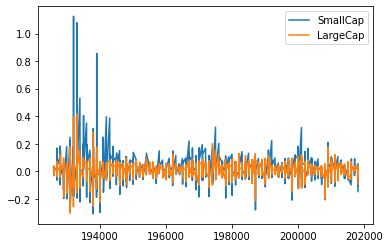

In [146]:
returns.plot.line()

### 1. Anualized returns for Lo 20 and Hi 20

In [147]:
n_months = returns.shape[0]

In [148]:
#get monthly returns
return_per_month= ((returns+1).prod()**(1/n_months))-1

In [149]:
(returns+1).prod()

SmallCap    482561.492968
LargeCap      5938.101622
dtype: float64

In [150]:
return_per_month

SmallCap    0.011860
LargeCap    0.007859
dtype: float64

In [151]:
annualized_return = ((return_per_month +1)**12)-1

In [152]:
annualized_return

SmallCap    0.151977
LargeCap    0.098490
dtype: float64

### 2 - Annualized volatility Lo 20 and Hi 20

In [153]:
annualized_vol = returns.std()*np.sqrt(12)

In [154]:
annualized_vol

SmallCap    0.336701
LargeCap    0.195116
dtype: float64

### 5 Annualized return of the Lo 20 over 1999-2015

In [155]:
years = pd.to_datetime(returns.index, format = "%Y%m").year

In [156]:
year_index = (years >= 1999) & (years <= 2015)

In [157]:
ret_per_month_1999 = (returns[year_index]+1).prod()**(1/returns[year_index].shape[0])-1

In [158]:
(ret_per_month_1999+1)**12-1

SmallCap    0.114426
LargeCap    0.062865
dtype: float64

In [159]:
returns[year_index].std()*np.sqrt(12)

SmallCap    0.228894
LargeCap    0.172713
dtype: float64

### 9 Max drowdown

In [160]:
ret_99 = returns[year_index]

In [161]:
wealth_index = (ret_99+1).cumprod()
previous_peaks = wealth_index.cummax()

In [162]:
drawdowns = (wealth_index - previous_peaks)/previous_peaks

In [163]:
drawdowns.min()

SmallCap   -0.624809
LargeCap   -0.552735
dtype: float64

In [164]:
drawdowns[drawdowns["SmallCap"] == drawdowns.min()[0]]

,SmallCap,LargeCap
200902,-0.624809,-0.552735


### 13 Edhec fund indices

In [120]:
import edhec_risk_kit as erk

hfi = erk.get_hfi_returns()

In [127]:
hfi_year_index = hfi.index.year>=2009

In [128]:
hfi_2009 = hfi[hfi_year_index]

In [137]:
erk.semideviation(hfi_2009).sort_values()

Fixed Income Arbitrage    0.003321
Merger Arbitrage          0.003611
Global Macro              0.005075
Equity Market Neutral     0.005186
Relative Value            0.005711
Convertible Arbitrage     0.006681
Funds Of Funds            0.007948
Distressed Securities     0.009498
Event Driven              0.010135
CTA Global                0.010996
Long/Short Equity         0.012139
Emerging Markets          0.015276
Short Selling             0.021240
dtype: float64

In [136]:
erk.skewness(hfi_2009).sort_values()

Equity Market Neutral    -0.896327
Funds Of Funds           -0.646908
Merger Arbitrage         -0.551065
Event Driven             -0.488821
Long/Short Equity        -0.463703
Distressed Securities    -0.254944
Emerging Markets          0.033123
CTA Global                0.052062
Relative Value            0.159953
Global Macro              0.348184
Short Selling             0.456518
Fixed Income Arbitrage    1.121453
Convertible Arbitrage     1.305911
dtype: float64

In [138]:
hfi_2000 = hfi[hfi.index.year>=2000]

In [139]:
erk.kurtosis(hfi_2000).sort_values()#very fat tails

CTA Global                 2.845022
Global Macro               3.653278
Short Selling              4.352758
Long/Short Equity          4.472589
Merger Arbitrage           4.520785
Event Driven               5.543444
Emerging Markets           5.941289
Distressed Securities      6.231720
Funds Of Funds             7.584725
Relative Value            12.731096
Equity Market Neutral     20.329621
Convertible Arbitrage     23.001449
Fixed Income Arbitrage    33.378729
dtype: float64